<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
#conda install -c conda-forge xgboost

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

In [71]:
import sklearn
sklearn.__version__

'1.3.1'

In [72]:
import xgboost
xgboost.__version__

'1.7.3'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [73]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')

In [74]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [75]:
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [76]:
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3      10043                           

In [77]:
df_female.rename(columns={"SubjectId":"subjectid"}, inplace=True)

# df_male ile df_female'i concate edebilmemiz için tüm featurların aynı şekilde olması lazım. O yüzden farklı olan SubjectId
# feature ismini birbirleriyle aynı formata getiriyoruz.

In [78]:
df_female.head(1)

# aynı formata geldiklerini gördük

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   

   interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  kneeheightsitting  lateralfemoralepicondyleheight  lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  palmlength  poplitealheight  radialestylionlength  shouldercircumference  shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  suprasternaleheight  tenthribheight  thighcircumference  thighclearance  thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  waistheightomphalion  weightkg  wristcircumference  wristheight  Gender      Date Installation     Component          Branch PrimaryMOS SubjectsBirthLocation  SubjectNumericRace Ethnicity  DODRace  Age  Heightin  Weightlbs WritingPreference  
0                    645         363          399                   435                496                             447                      55                      404                  118                335                    368                           1268         113              362                   235                   1062                  327             148            803                     809            513  1647     1560                 1280            1013                 622             174            736           430               110                  844                           1488              406           295                 850         217                      345                   942       657                 152          756  Female  5-Oct-10    Fort Hood  Regular Army  Combat Support        92Y               Germany                   2       NaN        2   26        61        142        Right hand

In [79]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [80]:
df = pd.concat([df_male,df_female], axis=0, ignore_index=True)
df.head()

# ignore_index=True ile yeni oluşturduğumuz df'in indexlerinin 0'dan başlayacak şekilde yeniden düzenlenmesini isitiyoruz.
# Eğer bu işlemi yapmazsak df_male ve df_female'in indexleri aynı kalır.

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3      10092                           

In [81]:
df.shape

(6068, 108)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [83]:
df.info(verbose=True)

# Çok feature içeren df'lerde tüm featurlara ait bilgileri görmek istiyorsak verbose=True yapıyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [84]:
df.isnull().sum().any()

# miisng value var. Aşağıda kontrolünü sağlayacağız.

True

In [85]:
df.duplicated().sum()

# duplicate verimiz yok.

0

In [86]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

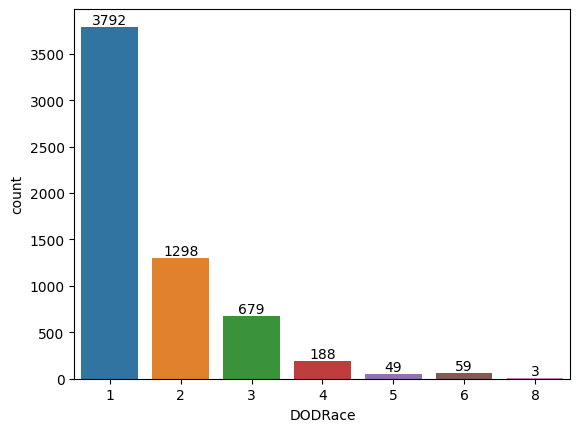

In [87]:
ax = sns.countplot(x='DODRace', data=df)
ax.bar_label(ax.containers[0]);

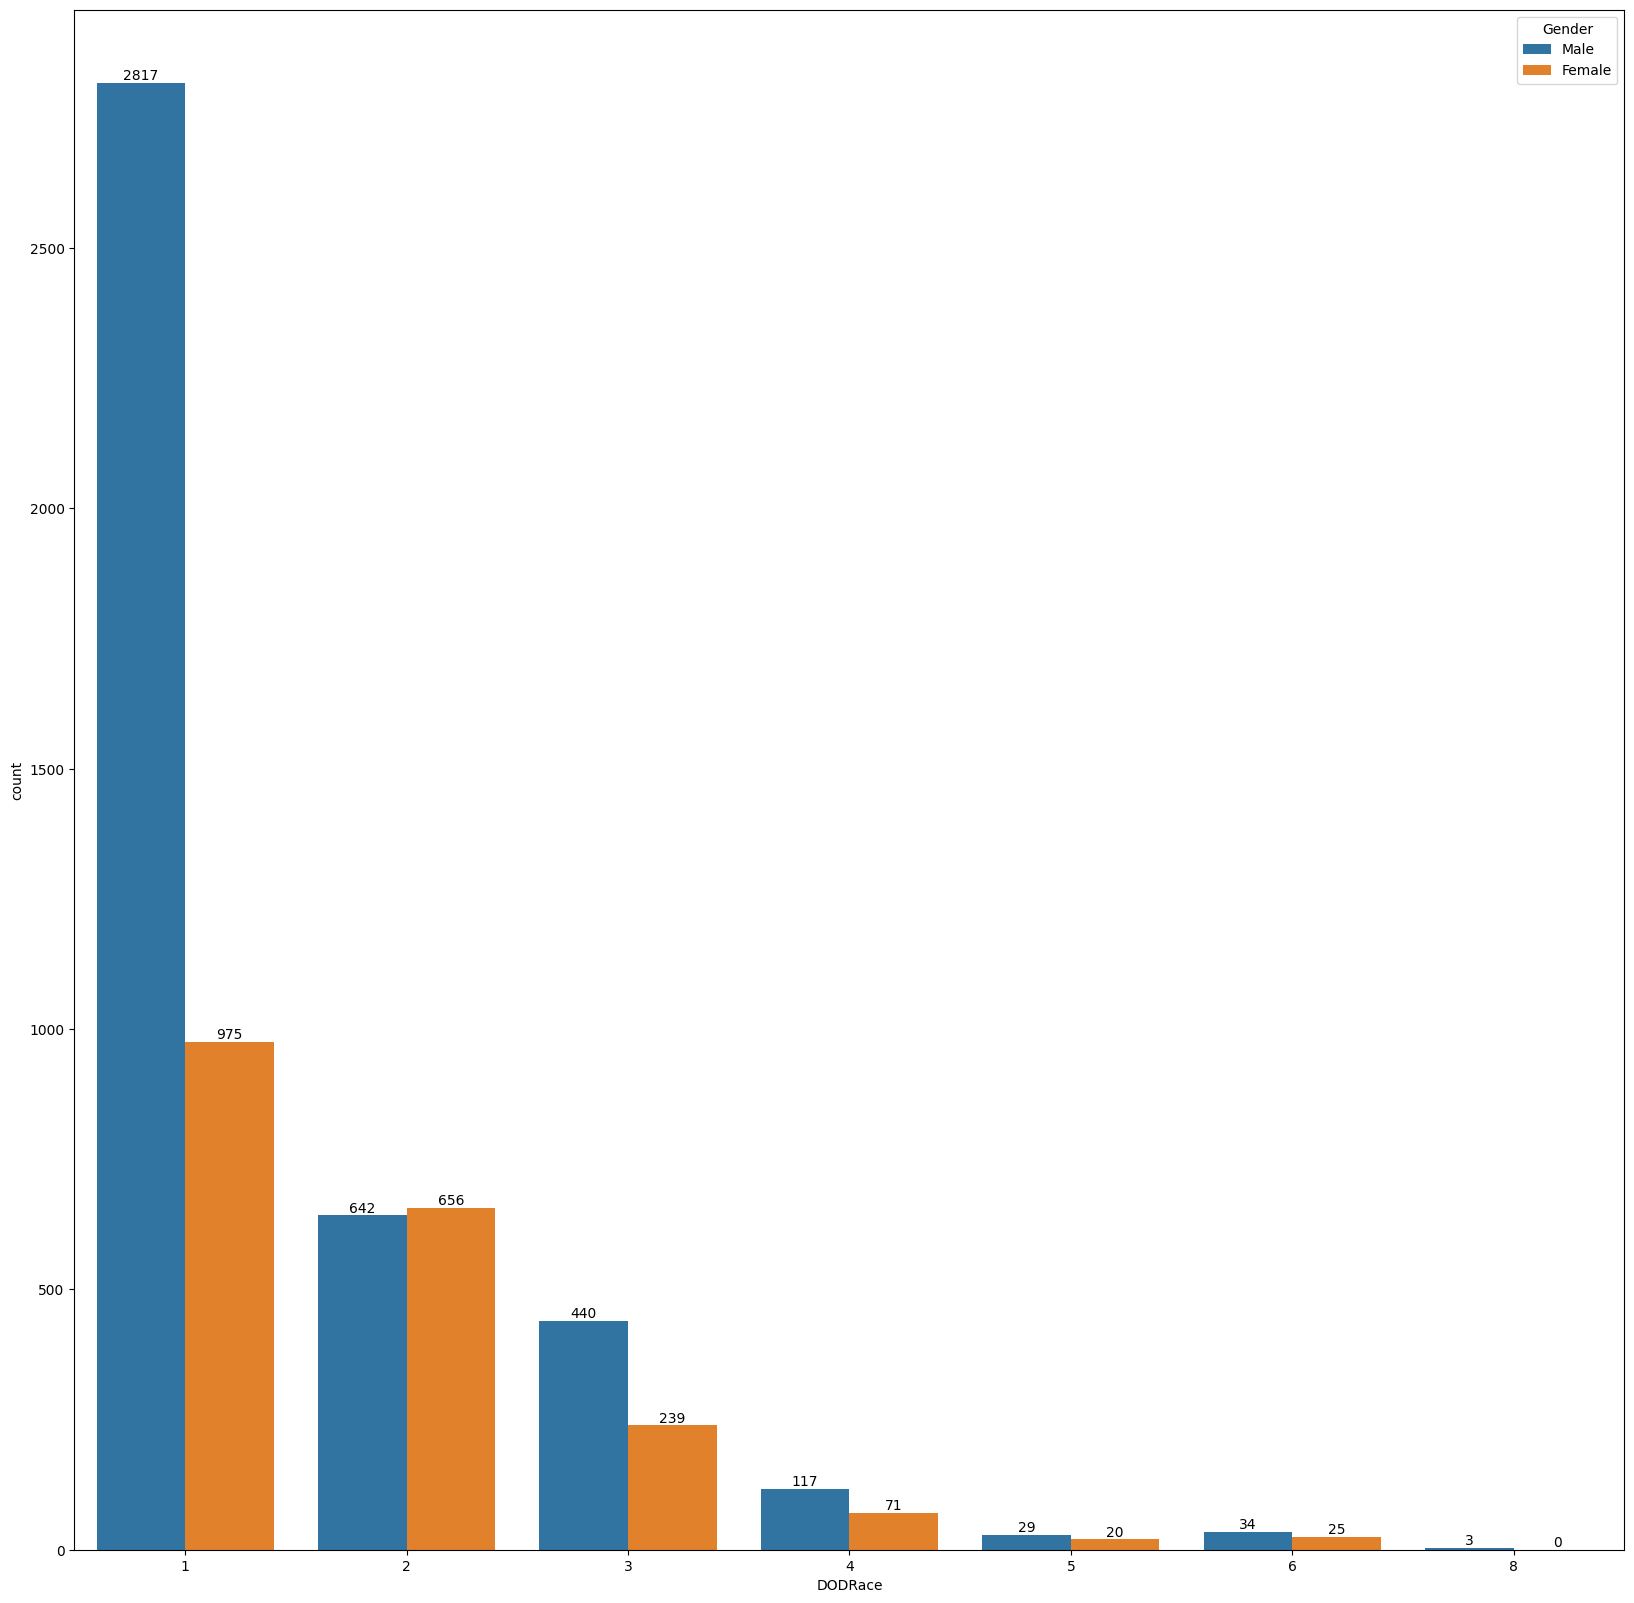

In [88]:
plt.figure(figsize=(20,20))
ax = sns.countplot(x='DODRace', hue = 'Gender', data=df)

for i in range(2):
    ax.bar_label(ax.containers[i]);

In [89]:
drop_list =[]
for col in df:
    if df[col].isnull().sum()>0:
        print(f"{col} = {df[col].isnull().sum()}")
        drop_list.append(col)
  
  
drop_list 

# Missing value olan featurları tespit ettik. Ethnicity featuranda 4647 adet missisng value var. Best practice olarak missing
# valuelere yaklaşım toplam gözlem sayısının %20 ile %30 aralığında missisng valuemız varsa bu değerler doldurulabilir. Ancak 
# daha fazla ise data manuple etmeye gireceğinden ilgili data drop edilir. 4647/6068 = %76'ya tekabül ettiğinden bu feature
# drop edeceğiz.

# 6068 x 0.2 = 1213 ile 6068 x 0.3 = 1820 aralığında bir değer seçip bu değerden daha fazla missing value'sı olan featurları
# drop edebilirsiniz. Aşağıdaki gibi

#drop_list =[]
#for col in df:
#  if df[col].isnull().sum()>1800:
#    print(f"{col} = {df[col].isnull().sum()}")
#    drop_list.append(col)

Ethnicity = 4647


['Ethnicity']

In [90]:
df.drop(columns = drop_list, inplace=True)

# Ethnicity was dropped.

In [91]:
df.isnull().sum().any()



False

In [92]:
df.shape



(6068, 107)

In [93]:
# to find how many unique values object features have
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

# unique kategorik gözlem sayılarımızı kontrol ediyoruz.
# Vücut ölçüm tarihlerini gösteren featuranin (Date), ölçümlerin yapıldığı birliklerin (installation), askerlerin uzmanlık 
# alanının (PrimaryMOS) ırklara yönelik bir insight sağlamayacağından drop edeceğiz.

# askerlerin görev yaptığı birlik(componenet) ile görev aldığı branşın(branch) bir etkisi olup olmadığını aşağıda kontrol 
# edeceğiz. (fiziki gücü nispeten daha iyi olan blacklerin ön plana çıkması gibi)

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [94]:
df.SubjectsBirthLocation.value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

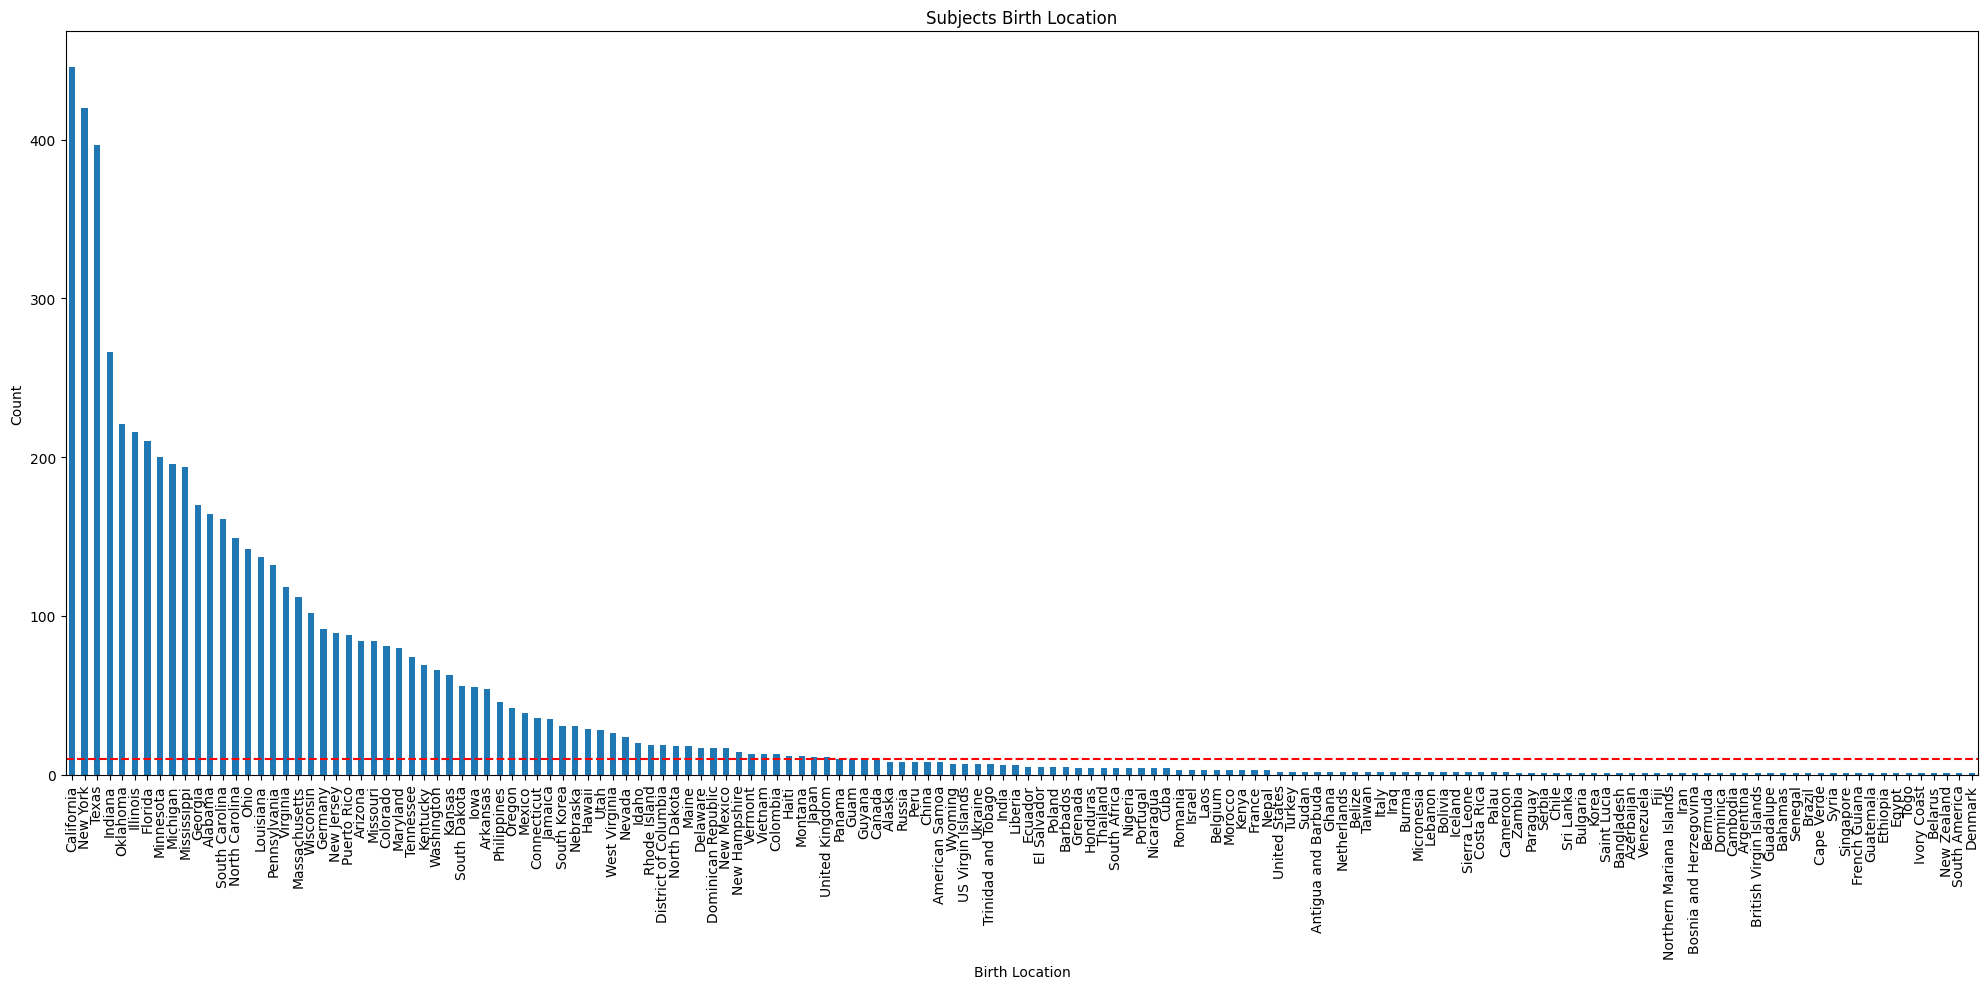

In [95]:
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--')  # Some research says 10 rows are enough for each category to be represented
plt.tight_layout();

In [96]:
df.DODRace.unique()

# Targetımdaki unique classları görüyoruz.

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [97]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

# Targetımdaki numeric verileri daha anlaşılır hala getirmek için dökümanda belirtilen etnik isimlerine göre yeniden
# isimlendiriyoruz.

In [98]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

# Askerlerin görev yaptıkları birliklere göre ırk dağılımlarına bağtığımızda 3 birlikteki white, black, hispanic dağılımı
# orjinal datadali genel dağılıma benzer veya yakın. 
# hispanic ırkının baskın olduğu bir birlik yok. Component featura üzerinden ırkların tespitine yönelik bir insight 
# elde edemedik.

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: DODRac

<Axes: ylabel='Component,DODRace'>

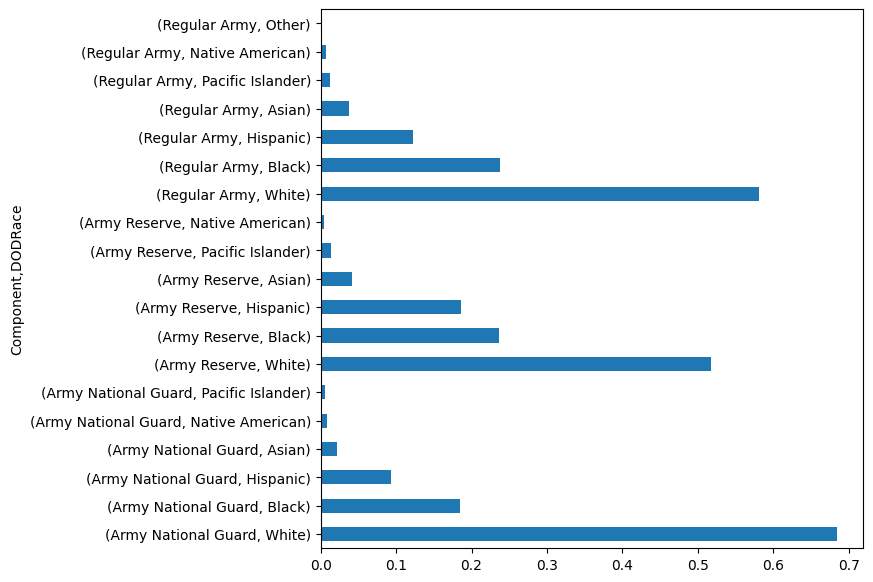

In [99]:
df.groupby(["Component"])["DODRace"].value_counts(normalize = True).plot(kind="barh", figsize=(7,7))

In [100]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

# yukarda elde ettiğimiz insightlra benzer insightlar elde ettik. Hispaniclerin baskın olduğu bir birlik veya branş yok.
# "Component", "Branch" featurlarını düşüreceğiz.

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

<Axes: ylabel='Component,Branch,DODRace'>

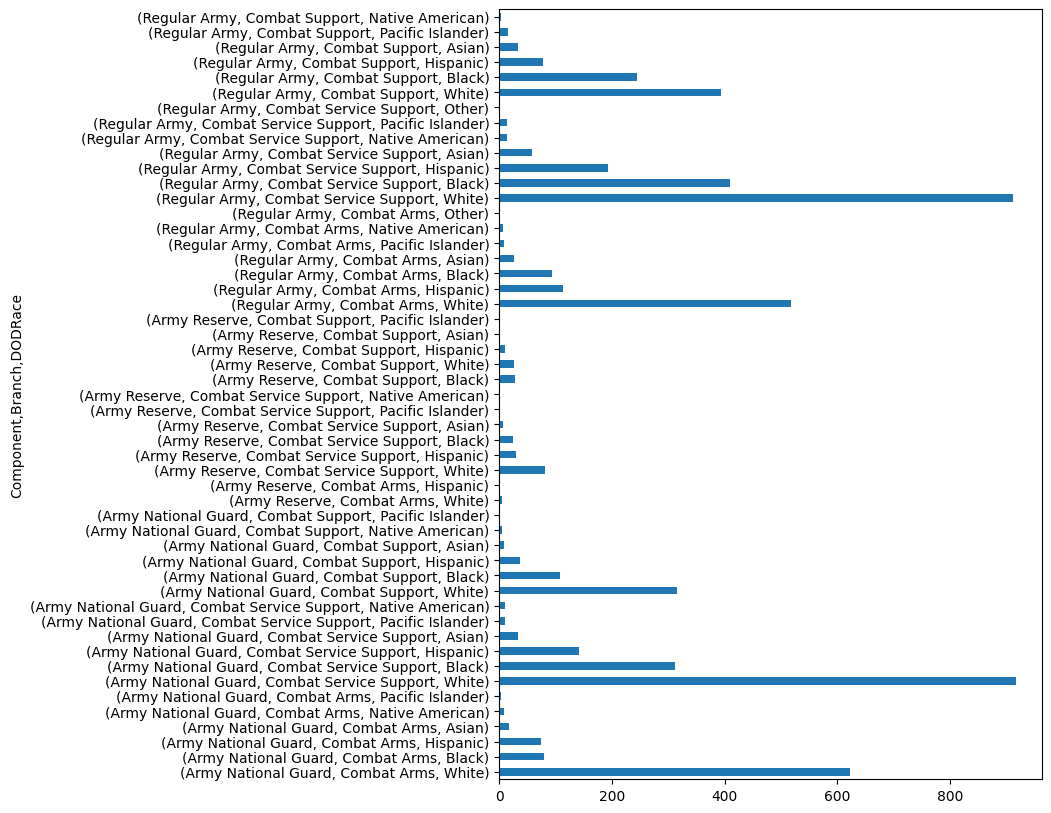

In [101]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(kind="barh", figsize=(7,10))

In [102]:
df.SubjectNumericRace.value_counts()

# bizim targatımız olan DODRace'i tarif eden bir featura. Data leakageye sebebiyet vereceğinden drop edeceğiz.

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [103]:
drop_list2 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin", "subjectid", "SubjectNumericRace"
]

df.drop(columns= drop_list2, inplace=True)

# "Weightlbs", "Heightin" featurları askerlerin kendi rapor ettikleri bilgilerden oluştuğundan drop ediyoruz. 
# boy ve kilo bilgileri ölçülüp ayrı featurla olarak dataya dahil edilmiştir.
# subjectid askerlerin sicil numarası olduğundan ırklarına dair bize bir insight sağlamayacağından drop ediyoruz.

In [104]:
df.shape

(6068, 98)

In [105]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [106]:
df2 = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") | (df["DODRace"] == "Hispanic")]
df2

# 500'den fazla olan classları filtreliyoruz. 

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [107]:
df2.reset_index(drop=True, inplace=True)

# indexleri resetliyoruz.

In [108]:
df2.select_dtypes("number")

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

<Axes: >

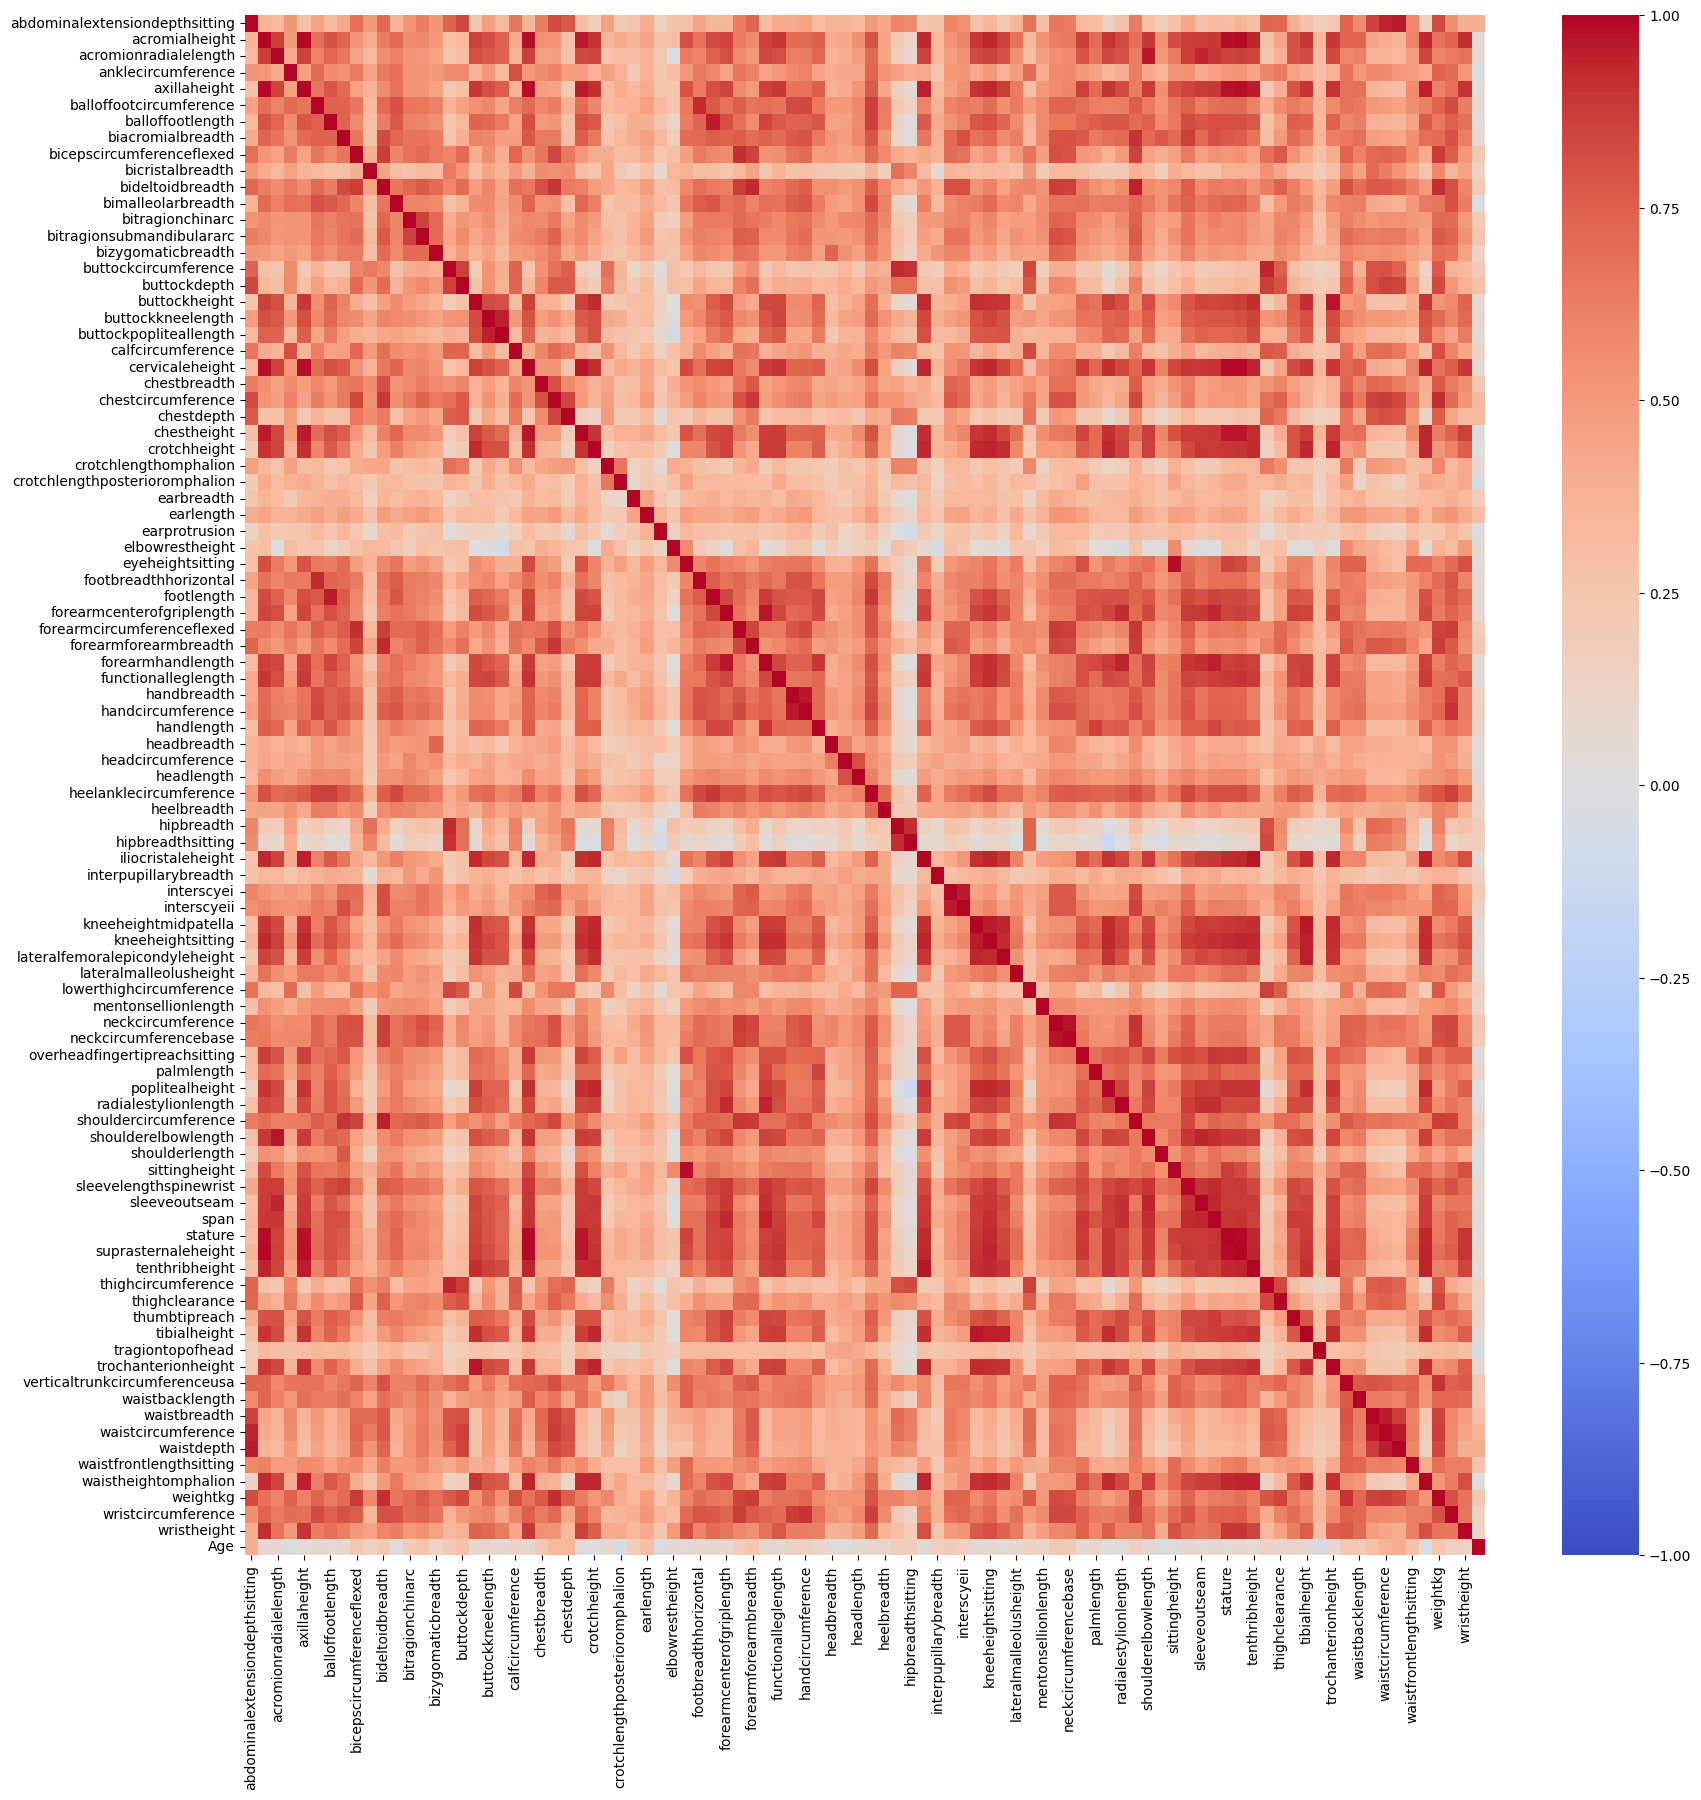

In [109]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.select_dtypes("number").corr(),vmin=-1, vmax=1, cmap ="coolwarm")



In [110]:
df_numeric = df2.select_dtypes(include ="number")
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any()

# multicolinarity dedection.

abdominalextensiondepthsitting     True
acromialheight                     True
acromionradialelength              True
anklecircumference                False
axillaheight                       True
balloffootcircumference            True
balloffootlength                   True
biacromialbreadth                  True
bicepscircumferenceflexed          True
bicristalbreadth                  False
bideltoidbreadth                   True
bimalleolarbreadth                False
bitragionchinarc                  False
bitragionsubmandibulararc         False
bizygomaticbreadth                False
buttockcircumference               True
buttockdepth                      False
buttockheight                      True
buttockkneelength                  True
buttockpopliteallength             True
calfcircumference                 False
cervicaleheight                    True
chestbreadth                      False
chestcircumference                 True
chestdepth                        False


In [111]:
df2.describe().T

count         mean         std     min     25%     50%     75%     max
abdominalextensiondepthsitting  5769.0   247.254290   37.457748   155.0   220.0   243.0   272.0   451.0
acromialheight                  5769.0  1408.630265   78.303123  1146.0  1353.0  1412.0  1464.0  1683.0
acromionradialelength           5769.0   328.071590   20.444554   249.0   314.0   328.0   342.0   393.0
anklecircumference              5769.0   225.201768   15.965783   156.0   214.0   225.0   235.0   293.0
axillaheight                    5769.0  1301.902583   71.260913  1062.0  1252.0  1304.0  1351.0  1553.0
balloffootcircumference         5769.0   244.408043   16.803556   186.0   233.0   245.0   256.0   306.0
balloffootlength                5769.0   195.118911   13.379000   151.0   186.0   196.0   205.0   245.0
biacromialbreadth               5769.0   399.706015   30.124094   283.0   377.0   404.0   422.0   489.0
bicepscircumferenceflexed       5769.0   341.663027   41.270615   216.0   312.0   342.0   370.0   490.0
bicristalbreadth                5769.0   274.903449   19.239580   197.0   262.0   274.0   288.0   362.0
bideltoidbreadth                5769.0   491.454845   42.011888   357.0   461.0   493.0   520.0   637.0
bimalleolarbreadth              5769.0    72.335413    5.326965    55.0    68.0    73.0    76.0    91.0
bitragionchinarc                5769.0   324.962212   17.050426   267.0   314.0   326.0   336.0   385.0
bitragionsubmandibulararc       5769.0   306.677760   20.818789   245.0   292.0   307.0   321.0   390.0
bizygomaticbreadth              5769.0   139.529381    7.248670   116.0   134.0   140.0   145.0   166.0
buttockcircumference            5769.0  1022.059456   75.952953   737.0   970.0  1019.0  1071.0  1341.0
buttockdepth                    5769.0   242.234356   26.409001   168.0   223.0   241.0   259.0   349.0
buttockheight                   5769.0   872.112845   54.064846   656.0   834.0   870.0   908.0  1080.0
buttockkneelength               5769.0   610.449991   33.120828   479.0   587.0   610.0   633.0   736.0
buttockpopliteallength          5769.0   498.331773   28.512562   380.0   478.0   498.0   518.0   605.0
calfcircumference               5769.0   386.316519   30.577787   266.0   365.0   385.0   406.0   523.0
cervicaleheight                 5769.0  1479.952158   83.590746  1208.0  1421.0  1487.0  1539.0  1738.0
chestbreadth                    5769.0   283.232623   20.612214   213.0   269.0   283.0   297.0   363.0
chestcircumference              5769.0  1024.206622  100.375776   695.0   952.0  1023.0  1093.0  1469.0
chestdepth                      5769.0   252.322586   26.660255   170.0   234.0   251.0   270.0   383.0
chestheight                     5769.0  1254.290172   78.882449  1000.0  1199.0  1261.0  1310.0  1506.0
crotchheight                    5769.0   827.105738   54.056267   610.0   789.0   827.0   864.0  1031.0
crotchlengthomphalion           5769.0   622.693708   45.087220   473.0   592.0   621.0   652.0   799.0
crotchlengthposterioromphalion  5769.0   351.880222   29.807293   243.0   331.0   351.0   372.0   468.0
earbreadth                      5769.0    35.175420    3.221118    25.0    33.0    35.0    37.0    46.0
earlength                       5769.0    62.606171    4.861629    46.0    59.0    62.0    66.0    81.0
earprotrusion                   5769.0    22.227249    3.149012    13.0    20.0    22.0    24.0    34.0
elbowrestheight                 5769.0   240.553302   28.595503   138.0   222.0   241.0   260.0   345.0
eyeheightsitting                5769.0   786.399203   41.843182   654.0   757.0   788.0   816.0   912.0
footbreadthhorizontal           5769.0    98.915063    6.658949    77.0    94.0    99.0   104.0   126.0
footlength                      5769.0   263.512394   17.231642   210.0   252.0   265.0   276.0   323.0
forearmcenterofgriplength       5769.0   339.458832   23.081597   258.0   323.0   341.0   356.0   416.0
forearmcircumferenceflexed      5769.0   295.661640   29.857253   200.0   273.0  

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [112]:
X = df2.drop(columns= ["DODRace"])
y = df2.DODRace

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify = y)

In [114]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [115]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [116]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [117]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [118]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat),
                                                      remainder=MinMaxScaler(),
                                                      verbose_feature_names_out=False)

In [119]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans),
              ("log", LogisticRegression(class_weight='balanced',
                                         random_state=55))]

pipe_log_model = Pipeline(steps=operations)

In [120]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[244   8   8]
 [ 10 103  23]
 [ 25  84 649]]
              precision    recall  f1-score   support

       Black       0.87      0.94      0.91       260
    Hispanic       0.53      0.76      0.62       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   35   32]
 [  16  462   65]
 [  57  352 2625]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [121]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels = ["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [122]:
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         random_state=55))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.500372
train_precision_Hispanic    0.544140
test_recall_Hispanic        0.789933
train_recall_Hispanic       0.850216
test_f1_Hispanic            0.611857
train_f1_Hispanic           0.663577
dtype: float64

### Logistic Model GridsearchCV

In [123]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [124]:
param_grid = {
    "log__C": [0.1, 0.2, 0.5, 1, 2, 5],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
}

In [125]:
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(class_weight='balanced',
                                         random_state=55))]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [126]:
log_model_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=55))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.2, 0.5, 1, 2, 5],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs', 'newton-cg',
                                         'sag', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [127]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=55))])

In [128]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [129]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.789933
mean_train_score    0.850012
Name: 36, dtype: object

In [130]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[244   8   8]
 [ 10 103  23]
 [ 25  84 649]]
              precision    recall  f1-score   support

       Black       0.87      0.94      0.91       260
    Hispanic       0.53      0.76      0.62       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   35   32]
 [  16  462   65]
 [  57  352 2625]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [131]:
operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(C=1,
                                         class_weight='balanced',
                                         random_state=55, penalty= 'l2', solver= 'lbfgs' ))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.500372
train_precision_Hispanic    0.544140
test_recall_Hispanic        0.789933
train_recall_Hispanic       0.850216
test_f1_Hispanic            0.611857
train_f1_Hispanic           0.663577
dtype: float64

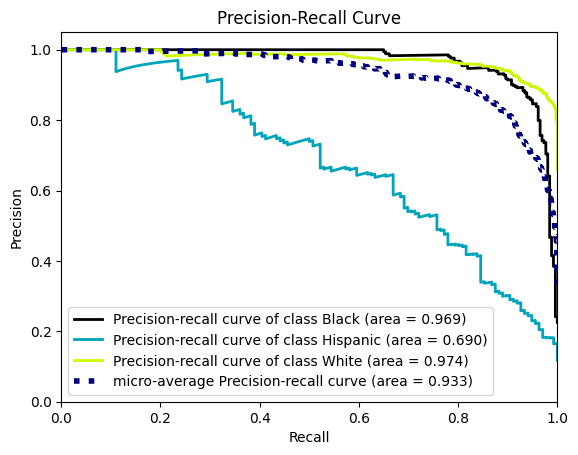

In [132]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [("OneHotEncoder", column_trans), 
              ("log", LogisticRegression(C=1,
                                         class_weight='balanced',
                                         random_state=55, penalty= 'l2', solver= 'lbfgs' ))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

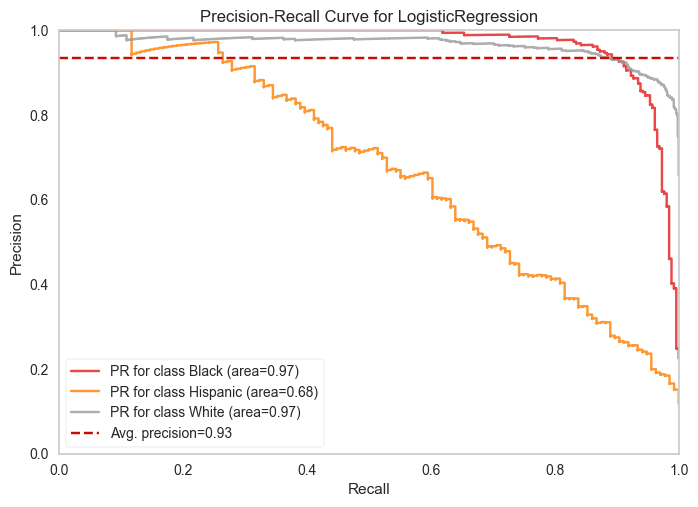

In [133]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(C=1,
                                         class_weight='balanced',
                                         random_state=55, penalty= 'l2', solver= 'lbfgs' ))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [134]:
pd.get_dummies(y_test).values

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [135]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# 0 black, 1 hispanic, 2 white skorlarını döndürür.
# Burda 1 vererek hispanic skorları aldık.

0.6899534102224646

In [136]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# tüm modellerden aldığımız skorları aşağıda tabloda karşılaştıracağımızdan skorlarımızı değişkenlere atıyoruz.

## 2. SVC

### Vanilla SVC model 

In [137]:
operations_svc = [("OneHotEncoder", column_trans), 
                  ("svc", SVC(class_weight="balanced",random_state=55))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [138]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240   9  11]
 [  9 106  21]
 [ 20 108 630]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.48      0.78      0.59       136
       White       0.95      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 957   40   41]
 [  23  451   69]
 [  43  395 2596]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93      1038
    Hispanic       0.51      0.83      0.63       543
       White       0.96      0.86      0.90      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [139]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.466978
train_precision_Hispanic    0.511620
test_recall_Hispanic        0.760438
train_recall_Hispanic       0.834250
test_f1_Hispanic            0.577684
train_f1_Hispanic           0.634218
dtype: float64

###  SVC Model GridsearchCV

In [140]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [141]:
param_grid = {
    'svc__C': [0.1, 0.2, 0.3, 1],
    'svc__gamma': ["scale", "auto", 0.01, 1],
    'svc__kernel':['linear', 'rbf']
}

In [142]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(class_weight="balanced",random_state=55))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [143]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=55))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 0.2, 0.3, 1],
                         'svc__gamma': ['scale', 'auto', 0.01, 1],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [144]:
svm_model_grid.best_params_

{'svc__C': 0.2, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [145]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.793603
mean_train_score    0.836095
Name: 8, dtype: object

In [146]:
operations_svc = [("OneHotEncoder", column_trans),
                  ("svc", SVC(C=0.2, 
                              class_weight='balanced', 
                              kernel='linear', 
                              random_state=55))]

model = Pipeline(steps=operations_svc)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.478259
train_precision_Hispanic    0.504842
test_recall_Hispanic        0.793603
train_recall_Hispanic       0.836095
test_f1_Hispanic            0.596182
train_f1_Hispanic           0.629522
dtype: float64

In [147]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[243   7  10]
 [  8 107  21]
 [ 21  99 638]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.86      1154
   macro avg       0.78      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 957   45   36]
 [  21  454   68]
 [  55  407 2572]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.84      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



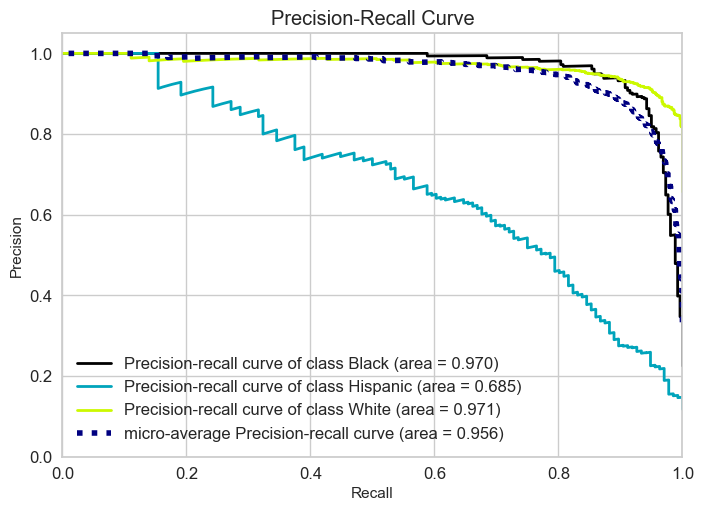

In [152]:
from scikitplot.metrics import plot_precision_recall
operations = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=55, C=0.2, probability=True, gamma="scale", kernel="linear"))]

model = Pipeline(steps=operations)
model.fit(X_train, y_train)
decision_function = model.decision_function(X_test)


plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [153]:
decision_function

array([[-0.25333713,  0.80943826,  2.27274485],
       [-0.23349123,  0.86027019,  2.25123833],
       [-0.17010116,  1.10470975,  2.1229063 ],
       ...,
       [-0.16537581,  0.83313106,  2.22174085],
       [-0.24410215,  2.27254162,  0.78798515],
       [-0.23434424,  0.89006349,  2.24696608]])

In [154]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6620937896865099

In [155]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [157]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [158]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                       remainder='passthrough')

### Vanilla RF Model

In [159]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                     random_state=55))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=55))])

In [160]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[185   0  75]
 [  6  10 120]
 [  8   1 749]]
              precision    recall  f1-score   support

       Black       0.93      0.71      0.81       260
    Hispanic       0.91      0.07      0.14       136
       White       0.79      0.99      0.88       758

    accuracy                           0.82      1154
   macro avg       0.88      0.59      0.61      1154
weighted avg       0.84      0.82      0.78      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [161]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=55))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.691667
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.042357
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.079345
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [162]:
param_grid = {'RF_model__n_estimators':[300,400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['sqrt', 'log2' None, 15, 20]
             

In [163]:
operations_rf = [("OrdinalEncoder", column_trans),
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=55))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             cv=10,
                             return_train_score=True)

In [164]:
rf_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=55))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [300, 400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [165]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=500, random_state=55))])

In [166]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 500}

In [167]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.622559
mean_train_score    0.664416
Name: 5, dtype: object

In [168]:
rf_grid_model.best_score_

0.6225589225589225

In [169]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[196  43  21]
 [ 11  88  37]
 [ 66 275 417]]
              precision    recall  f1-score   support

       Black       0.72      0.75      0.74       260
    Hispanic       0.22      0.65      0.32       136
       White       0.88      0.55      0.68       758

    accuracy                           0.61      1154
   macro avg       0.60      0.65      0.58      1154
weighted avg       0.76      0.61      0.65      1154


Train_Set
[[ 786  166   86]
 [  51  359  133]
 [ 273 1082 1679]]
              precision    recall  f1-score   support

       Black       0.71      0.76      0.73      1038
    Hispanic       0.22      0.66      0.33       543
       White       0.88      0.55      0.68      3034

    accuracy                           0.61      4615
   macro avg       0.61      0.66      0.58      4615
weighted avg       0.77      0.61      0.65      4615



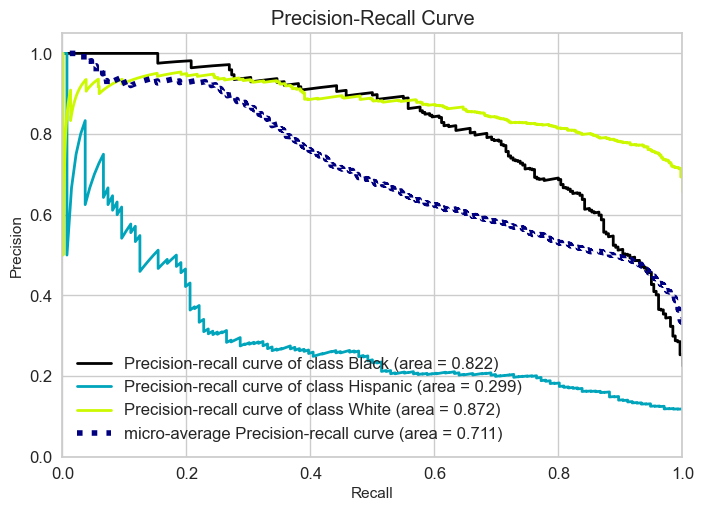

In [170]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth=3, 
                                                     n_estimators=500, 
                                                     random_state=55))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [171]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.2986326365774984

In [172]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [173]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=55))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2}) # sıralama classification_report ile aynı olacak.
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})
# xgb 1.6 ve üzeri versiyonlarda target numeric olmaz ise hata döndürüyor. Bu sebeple manuel olarak dönüşümü yapıyoruz.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [174]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[226   2  32]
 [ 11  51  74]
 [ 13   9 736]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       260
           1       0.82      0.38      0.52       136
           2       0.87      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [175]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train_xgb)
classes_weights

# XGboost algortimasının multiclass datalar için weight_class hyper parametresi olmadığından. fit fonksiyonu içinde 
# sample_weight hyper paremetresini kullanabiliyoruz.

array([1.4820167 , 1.4820167 , 1.4820167 , ..., 0.50703142, 0.50703142,
       0.50703142])

In [176]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
5189  1.482017      0
1452  1.482017      0
1677  1.482017      0
730   1.482017      0
3090  1.482017      0

In [177]:
comp.groupby("label").value_counts()

# weight x class_sayısı bize aynı sonuçları verecektir.

label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
dtype: int64

In [178]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,  
                   XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its 
# instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [179]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[230   4  26]
 [  8  61  67]
 [ 17  26 715]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       260
           1       0.67      0.45      0.54       136
           2       0.88      0.94      0.91       758

    accuracy                           0.87      1154
   macro avg       0.82      0.76      0.78      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [180]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}

# xgb categric target kabul etmediğinden hispaniclere karşılık gelen 1 numeric clasıına göre scoring_xgb'u düzenliyoruz.

In [181]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=55))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv=5, 
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.696190
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.430887
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.531993
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [182]:
param_grid = {"XGB_model__n_estimators":[20, 40, 50, 100],
              'XGB_model__max_depth':[1,2, 3],
              "XGB_model__learning_rate": [0.03, 0.05, 0.1],
              "XGB_model__subsample":[0.7, 0.8, 1],
              "XGB_model__colsample_bytree":[0,7, 0.8, 1]}

In [183]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=55))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=make_scorer(recall_score, average = None, labels =[1]),
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [184]:
xgb_grid_model.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=55, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0, 7, 0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05, 0.1],
                         'XGB_model__max_depth': [1, 2, 3],
                         'XGB_model__n_estimators': [20, 40, 50, 100],
                         'XGB_model__subsample': [0.7, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [185]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.8}

In [186]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.655657
mean_train_score    0.888116
Name: 430, dtype: object

In [187]:
xgb_grid_model.best_score_

0.65565749235474

In [188]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[233  12  15]
 [ 12  81  43]
 [ 27 102 629]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       260
           1       0.42      0.60      0.49       136
           2       0.92      0.83      0.87       758

    accuracy                           0.82      1154
   macro avg       0.73      0.77      0.75      1154
weighted avg       0.84      0.82      0.83      1154


Train_Set
[[ 976   30   32]
 [  19  468   56]
 [  93  318 2623]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1038
           1       0.57      0.86      0.69       543
           2       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



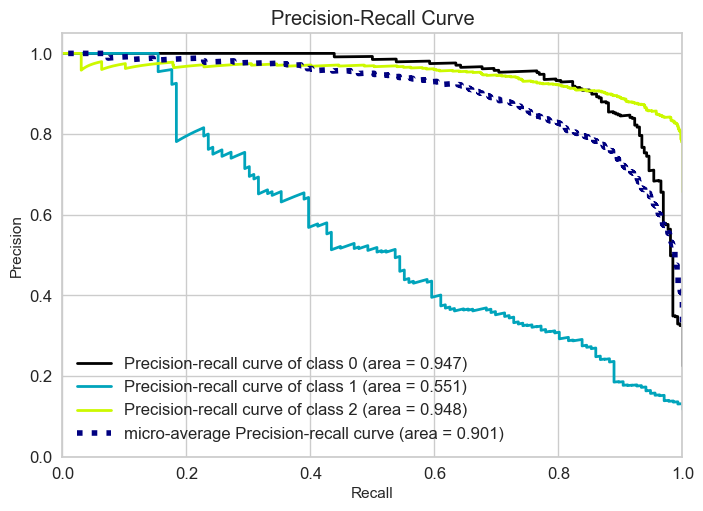

In [189]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(colsample_bytree=1,
                                              learning_rate=0.1,
                                              max_depth=3,
                                              n_estimators=100,
                                              subsample=0.8,
                                              random_state=55))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, 
          y_train_xgb, 
          XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [190]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [191]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.5509247189698068

In [192]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_precision = precision_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

In [193]:
compare= pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                       "Precision": [log_precision[0], svc_precision[0], rf_precision[0], xgb_precision[0]],
                       "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                       "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

compare

Model  Precision    Recall        AP
0  Logistic Regression   0.528205  0.757353  0.689953
1                  SVM   0.502347  0.786765  0.662094
2        Random Forest   0.216749  0.647059  0.298633
3              XGBoost   0.415385  0.595588  0.550925

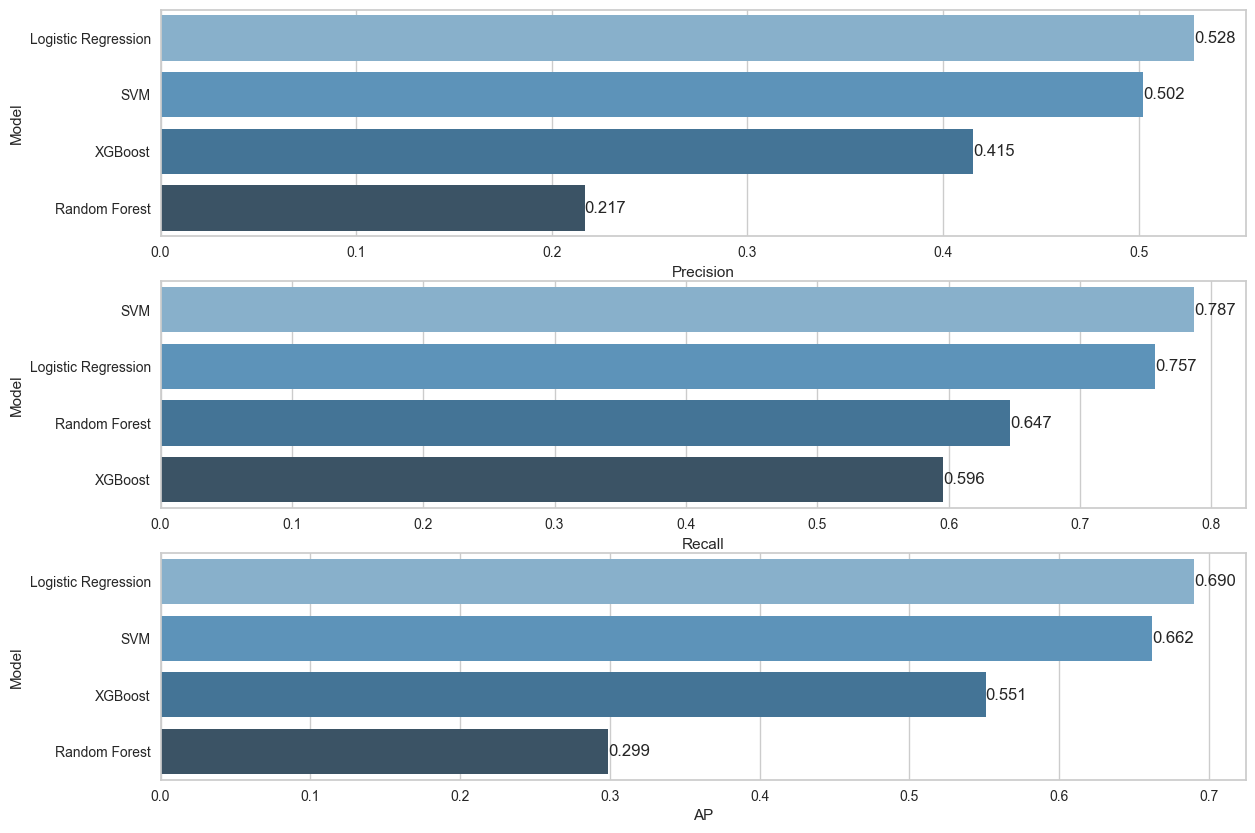

In [194]:
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

---
---

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [195]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                            sparse=False), cat),
                                              remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),
                    ("log", LogisticRegression(C=1,
                                               class_weight='balanced',penalty= 'l2', solver= 'lbfgs',
                                               random_state=55))]

final_model = Pipeline(steps=operations_final)

In [196]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=55))])

In [197]:
X[X.Gender=="Male"].describe()

# Datamızdaki tüm erkek askerlerin ortalama değerleri üzerinden modele tahmnin yaptıracağız.

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion   earbreadth    earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal   footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference   handlength  headbreadth  headcircumference   headlength  heelanklecircumference  heelbreadth   hipbreadth  hipbreadthsitting  iliocristaleheight  \
count                     3899.000000     3899.000000            3899.000000         3899.000000   3899.000000               3899.00000       3899.000000        3899.000000                3899.000000       3899.000000       3899.000000         3899.000000       3899.000000                3899.000000         3899.000000           3899.000000   3899.000000    3899.000000        3899.000000             3899.000000        3899.000000      3899.000000   3899.000000         3899.000000  3899.000000  3899.000000   3899.000000            3899.000000                     3899.000000  3899.000000  3899.000000    3899.000000      3899.000000       3899.000000            3899.000000  3899.000000                3899.000000                 3899.000000            3899.000000        3899.000000          3899.000000  3899.000000        3899.000000  3899.000000  3899.000000        3899.000000  3899.000000             3899.000000  3899.000000  3899.000000        3899.000000         3899.000000   
mean                       255.449090     1442.946397             335.819441          229.590921   1331.098487                252.16594        201.229546         416.004360                 358.579636        275.632213        510.927674           74.844063        331.655809                 315.718389          142.434983           1021.294178    246.362401     889.500385         619.217235              504.001026         392.426520      1519.422160    289.786868         1060.496794   254.390100  1293.040267    847.637599             623.143114                      356.354706    36.095153    64.171070      23.109772       244.823544        804.885099             101.893819   271.573993                 349.573480                  310.528084             580.702231         480.928956          1132.125673    88.379841         212.571172   193.509361   154.183637         574.708130   199.760708              344.002052    72.564504   346.256732         379.948448         1063.412670   
std                         37.295117       62.356906              17.281413           14.579399     58.714251                 12.89351         10.329358          19.074837                  34.511924         17.512428         32.450260            4.097052         13.970798                  16.640502            6.141613             76.330564     26.422432      49.412061          30.060334               26.981352          29.698052        62.429846     18.190824           87.116923    26.173356    56.142581     45.922897              46.408840                       29.395642     3.011680     4.499327       2.983150        28.714115         33.091957               5.227999    12.927804                  17.874884                   21.844380              50.829944          23.082555            55.414466     4.350016          10.141394     9.881058     5.453721          15.956198     6.854976               16.409163     5.473677    24.074708          30.120115           51.461725   
min                        163.000000  

In [198]:
male_mean_human = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean_human



abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [199]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

# ilgili atamaları yapıyoruz.

In [200]:
pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength anklecircumference axillaheight balloffootcircumference balloffootlength biacromialbreadth bicepscircumferenceflexed bicristalbreadth bideltoidbreadth bimalleolarbreadth bitragionchinarc bitragionsubmandibulararc bizygomaticbreadth buttockcircumference buttockdepth buttockheight buttockkneelength buttockpopliteallength calfcircumference cervicaleheight chestbreadth chestcircumference chestdepth  chestheight crotchheight crotchlengthomphalion crotchlengthposterioromphalion earbreadth earlength earprotrusion elbowrestheight eyeheightsitting footbreadthhorizontal  footlength forearmcenterofgriplength forearmcircumferenceflexed forearmforearmbreadth forearmhandlength functionalleglength handbreadth handcircumference  handlength headbreadth headcircumference  headlength heelanklecircumference heelbreadth  hipbreadth hipbreadthsitting iliocristaleheight interpupillarybreadth  interscyei interscyeii  \
mean                      255.44909    1442.946397            335.819441         229.590921  1331.098487               252.16594       201.229546         416.00436                358.579636       275.632213       510.927674          74.844063       331.655809                315.718389         142.434983          1021.294178   246.362401    889.500385        619.217235             504.001026         392.42652      1519.42216   289.786868        1060.496794   254.3901  1293.040267   847.637599            623.143114                     356.354706  36.095153  64.17107     23.109772      244.823544       804.885099            101.893819  271.573993                 349.57348                 310.528084            580.702231        480.928956         1132.125673   88.379841        212.571172  193.509361  154.183637         574.70813  199.760708             344.002052   72.564504  346.256732        379.948448         1063.41267            639.948705  431.393947  450.628623   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight lateralmalleolusheight lowerthighcircumference mentonsellionlength neckcircumference neckcircumferencebase overheadfingertipreachsitting  palmlength poplitealheight radialestylionlength shouldercircumference shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist sleeveoutseam         span      stature suprasternaleheight tenthribheight thighcircumference thighclearance thumbtipreach tibialheight tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa waistbacklength waistbreadth waistcircumference waistdepth waistfrontlengthsitting waistheightomphalion    weightkg wristcircumference wristheight Gender SubjectsBirthLocation        Age WritingPreference  
mean           489.366504        555.224929                     492.625545              73.061554              409.670685          122.684534        398.192101            435.159528                   1428.469351  116.610156      430.684791           268.313927           1179.902539          364.305976     149.832265    918.678636             897.179277    594.007951  1816.628879  1758.385483         1440.699667    1122.444473         626.335214      180.73942    813.085407   469.222878       131.116697          902.586817                   1666.783278      478.017953   327.110798         943.043344   238.5604               388.01744          1058.239805  858.714286         176.168761  848.762247   Male            California  30.172352        Right hand

In [201]:
final_model.predict(pd.DataFrame(male_mean_human).T)

# erkek askerlerin ortalama değerleri hispanic askerlere çok yakınmış diyebiliriz.

array(['Hispanic'], dtype=object)

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [202]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)



0.7760048234584901

In [203]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7687844542831144

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [205]:
!pip install imblearn

     -------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00


In [128]:
#conda install -c conda-forge imbalanced-learn

In [206]:
from imblearn.over_sampling import SMOTE # azınlık olan classları çoğunluk classa eşitler veya yakınlaştırır.
from imblearn.under_sampling import RandomUnderSampler # çoğunluk olan classı azınlık olan classa eşitler veya yakınlaştırır
from imblearn.pipeline import Pipeline as imbpipeline



In [207]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                      sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [208]:
X_train_ohe = column_trans.fit_transform(X_train)

 

In [209]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)



In [210]:
X_train_over.shape

(9102, 225)

In [211]:
y_train_over.value_counts()



Black       3034
White       3034
Hispanic    3034
Name: DODRace, dtype: int64

In [212]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [213]:
X_train_under.shape

(1629, 225)

In [214]:
y_train_under.value_counts()



Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [215]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})



In [216]:
y_train.value_counts()



White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [217]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [218]:
y_resampled_over.value_counts()



White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [219]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [220]:
y_resampled_under.value_counts()


White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [221]:

steps = [('o', over), ('u', under)]


pipeline = imbpipeline(steps=steps)

#önce hispanic clasının sayısı bizim verdiğimiz talimat kapsamında 1000'e çıkarılıp, sonra white clası 2500'e indirilecek.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [222]:
y_resampled.value_counts()

# hem white hem de hispanic classlarının sayısı değişti.

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [223]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [224]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [227]:
operations = [("OneHotEncoder",column_trans), 
              ('o', over),
              ('u', under), 
              ("log", LogisticRegression(C=1, penalty="l2", solver="lbfgs", 
                                         random_state=55))] #("scaler", MinMaxScaler())



In [228]:
smote_pipeline = imbpipeline(steps=operations)

In [229]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(C=1, random_state=55))])

In [230]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[240   5  15]
 [  9  83  44]
 [ 15  42 701]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.64      0.61      0.62       136
       White       0.92      0.92      0.92       758

    accuracy                           0.89      1154
   macro avg       0.82      0.82      0.82      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[ 955   26   57]
 [  21  397  125]
 [  27  141 2866]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.94      1038
    Hispanic       0.70      0.73      0.72       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.87      0.87      0.87      4615
weighted avg       0.92      0.91      0.91      4615



In [231]:
model = imbpipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.657873
train_precision_Hispanic    0.700994
test_recall_Hispanic        0.683064
train_recall_Hispanic       0.727441
test_f1_Hispanic            0.668980
train_f1_Hispanic           0.713932
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [241]:
#!pip install shap

     -------------------------------------- 447.3/447.3 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 28.1/28.1 MB 1.9 MB/s eta 0:00:00


In [242]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                           sparse=False), cat), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(C=1,
                                class_weight='balanced',
                                random_state=55,
                                penalty="l2",
                                solver='lbfgs')

model_shap.fit(X_train_trans, y_train)

# X-train ve X_test'e onehotencoder dönüşümü uyguluyoruz.
# shap pipeline ile kurulmuş model ile çalışmadığından dönüşüm işlemlerini manuel olarak yapacağız.

LogisticRegression(C=1, class_weight='balanced', random_state=55)

In [243]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[244   8   8]
 [ 10 103  23]
 [ 25  84 649]]
              precision    recall  f1-score   support

       Black       0.87      0.94      0.91       260
    Hispanic       0.53      0.76      0.62       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   35   32]
 [  16  462   65]
 [  57  352 2625]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [237]:
operations = [("OneHotEncoder", column_trans_shap),
              ("log", LogisticRegression(C=1,
                                         class_weight='balanced',
                                         random_state=55,
                                         penalty="l2",
                                         solver='lbfgs'))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# overfitting yok.

test_precision_Hispanic     0.500372
train_precision_Hispanic    0.544140
test_recall_Hispanic        0.789933
train_recall_Hispanic       0.850216
test_f1_Hispanic            0.611857
train_f1_Hispanic           0.663577
dtype: float64

In [238]:
features = column_trans_shap.get_feature_names_out()
features



array(['Gender_Female', 'Gender_Male', 'SubjectsBirthLocation_Alabama',
       'SubjectsBirthLocation_Alaska',
       'SubjectsBirthLocation_Antigua and Barbuda',
       'SubjectsBirthLocation_Arizona', 'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_Barbados', 'SubjectsBirthLocation_Belarus',
       'SubjectsBirthLocation_Belgium', 'SubjectsBirthLocation_Belize',
       'SubjectsBirthLocation_Bermuda', 'SubjectsBirthLocation_Bolivia',
       'SubjectsBirthLocation_Bosnia and Herzegovina',
       'SubjectsBirthLocation_Brazil',
       'SubjectsBirthLocation_British Virgin Islands',
       'SubjectsBirthLocation_Bulgaria',
       'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Cameroon', 'SubjectsBirthLocation_Canada',
       'SubjectsBirthLocation_Cape Verde', 'SubjectsBirthLocation_Chile',
       'SubjectsBirthLocation_Colombia', 'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBirthLocation_Costa Rica', 'S

## SHAP  values for Feature Selection (train data)

SHAP (Shapley Advantages for Hypothesized Alternatives Projections Explanations)

In [244]:
import shap



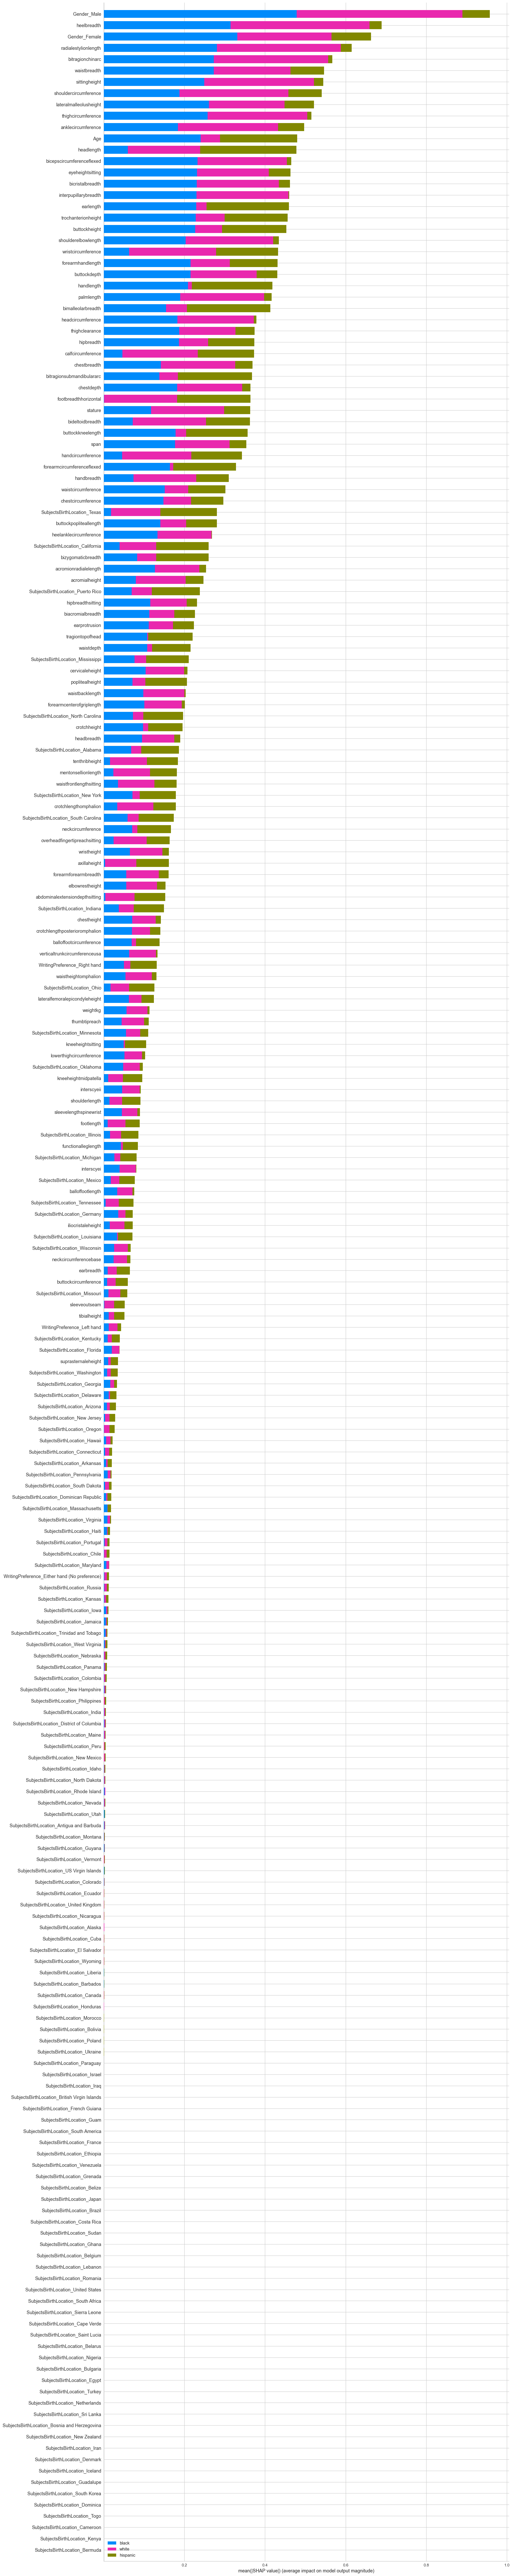

In [245]:
explainer = shap.LinearExplainer(model_shap, X_train_trans)


shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, 
                  max_display=300, 
                  feature_names = features, 
                  plot_size=(20,100), 
                  class_names=["black", "hispanic", "white"])

# maviler black, pembe white ve yeşil hispanic
# gördüğünüz gibi en önemli ilk 10 feature içerisinde hispanic'in tahminine katkı sağlayan feature yok.
# hispaniclerin predictionlara katkısı olan 16 feature seçiyoruz.

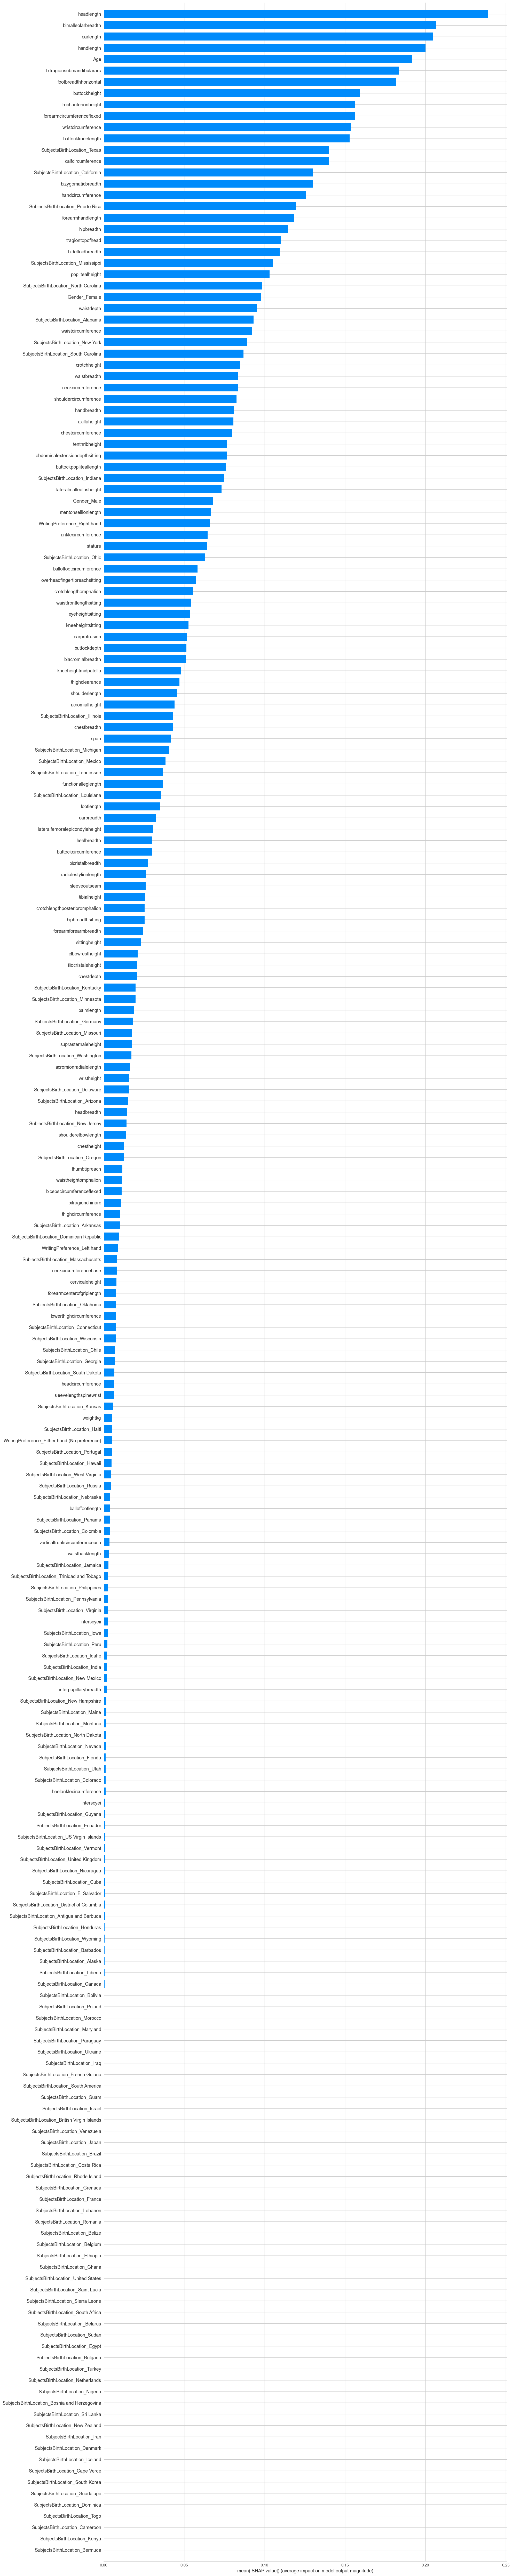

In [246]:
shap.summary_plot(shap_values[1], 
                  max_display=300, 
                  feature_names = features, 
                  plot_size=(20,100), 
                  plot_type="bar") 
# hispanicleri ayrıştırmada iyi olan featurların sıralaması.

In [250]:
hispanic=['headlength',
          'bimalleolarbreadth',
          'earlength',
          'handlength',
          'Age',
          'bitragionsubmandibulararc',
          'footbreadthhorizontal',
          'buttockheight',
          'trochanterionheight',
          'forearmcircumferenceflexed',
          'wristcircumference',
          'buttockkneelength',
          'SubjectsBirthLocation',
          'calfcircumference',
          'bizygomaticbreadth',
          'handcircumference']
          
         

In [251]:
len(hispanic)

16

In [252]:
X2 = X[hispanic]
X2.head()

headlength  bimalleolarbreadth  earlength  handlength  Age  bitragionsubmandibulararc  footbreadthhorizontal  buttockheight  trochanterionheight  forearmcircumferenceflexed  wristcircumference  buttockkneelength SubjectsBirthLocation  calfcircumference  bizygomaticbreadth  handcircumference
0         206                  71         71         193   41                        291                    101            882                  919                         299                 175                619          North Dakota                373                 142                214
1         201                  67         62         195   35                        320                     98            870                  918                         289                 167                584              New York                357                 135                203
2         202                  75         61         203   42                        330                    103            901                  918                         357                 180                623              New York                412                 135                220
3         199                  73         66         194   31                        309                    106            821                  847                         318                 176                560             Wisconsin                395                 143                217
4         197                  80         56         218   21                        310                    111           1080                 1090                         324                 188                706        North Carolina                425                 138                222

In [253]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation'], dtype='object')

In [254]:
X2.shape

(5769, 16)

In [255]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=55, stratify =y)

In [256]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                           sparse=False), cat_new), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

operations_shap = [("OneHotEncoder",column_trans_shap),
                   ("log", LogisticRegression(C=1, 
                                              class_weight='balanced',
                                              random_state=55,
                                              penalty="l2",
                                              solver='lbfgs'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=55))])

In [257]:
X_test2

headlength  bimalleolarbreadth  earlength  handlength  Age  bitragionsubmandibulararc  footbreadthhorizontal  buttockheight  trochanterionheight  forearmcircumferenceflexed  wristcircumference  buttockkneelength SubjectsBirthLocation  calfcircumference  bizygomaticbreadth  handcircumference
3181         194                  71         62         177   26                        291                     93            843                  866                         321                 173                613        South Carolina                405                 141                207
2030         194                  76         62         197   22                        297                     95            874                  891                         312                 174                597             Minnesota                357                 136                211
2388         198                  75         58         199   33                        316                     97            887                  900                         311                 168                622              New York                402                 138                202
4136         182                  66         62         181   23                        266                     89            778                  763                         251                 151                559            California                315                 131                182
12           199                  73         68         210   36                        311                    111            989                 1005                         342                 183                682        South Carolina                460                 149                225
...          ...                 ...        ...         ...  ...                        ...                    ...            ...                  ...                         ...                 ...                ...                   ...                ...                 ...                ...
3932         193                  65         69         186   42                        320                     88            884                  821                         277                 156                636                  Iowa                416                 139                190
5120         194                  65         53         188   22                        294                     87            803                  820                         255                 154                582             Louisiana                342                 136                185
4971         190                  70         56         185   18                        287                     94            870                  886                         276                 166                618          Pennsylvania                398                 137                193
5287         193                  67         59         163   32                        297                     90            775                  800                         283                 156                596           Puerto Rico                417                 140                190
26           206                  75         65         199   30                        325                    104            951                  959                         327                 184                640              New York                416                 143                221

[1154 rows x 16 columns]

In [258]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[197  22  41]
 [ 12 102  22]
 [118 136 504]]
              precision    recall  f1-score   support

       Black       0.60      0.76      0.67       260
    Hispanic       0.39      0.75      0.52       136
       White       0.89      0.66      0.76       758

    accuracy                           0.70      1154
   macro avg       0.63      0.72      0.65      1154
weighted avg       0.77      0.70      0.71      1154


Train_Set
[[ 824   66  148]
 [  38  438   67]
 [ 492  490 2052]]
              precision    recall  f1-score   support

       Black       0.61      0.79      0.69      1038
    Hispanic       0.44      0.81      0.57       543
       White       0.91      0.68      0.77      3034

    accuracy                           0.72      4615
   macro avg       0.65      0.76      0.68      4615
weighted avg       0.78      0.72      0.73      4615



In [259]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, 
                        X_train2,
                        y_train2, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.424228
train_precision_Hispanic    0.441987
test_recall_Hispanic        0.769832
train_recall_Hispanic       0.812563
test_f1_Hispanic            0.546232
train_f1_Hispanic           0.572533
dtype: float64

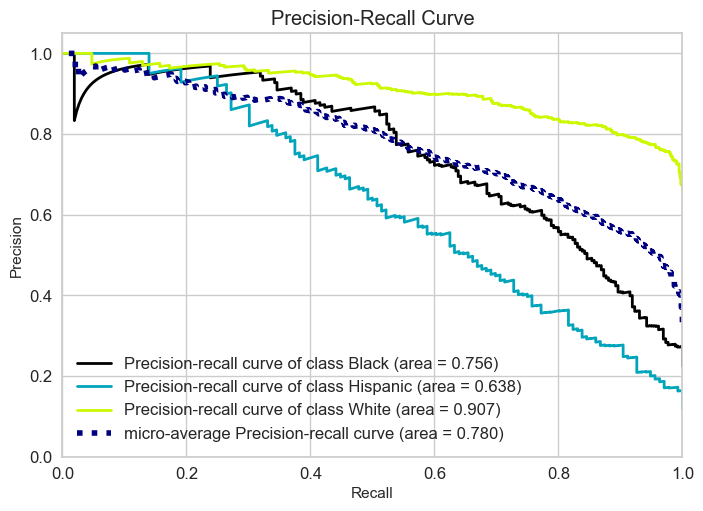

In [260]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show();

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>
